# Logistic regression

## Lung Cancer Prediction (High, Low, Medium)
This dataset contains information on patients with lung cancer, including their age, gender, 
air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic 
lung disease, balanced diet, obesity, smoking, passive smoker, chest pain, coughing of blood, fatigue, 
weight loss ,shortness of breath ,wheezing ,swallowing difficulty ,clubbing of finger nails and snoring

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('cancer patient data sets.csv')

In [7]:
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.shape

(1000, 26)

In [6]:
missing_values_sum = df.isna().sum()
print("Sum of missing values:", missing_values_sum)

Sum of missing values: index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [15]:
#Seperate target variables
X = df.iloc[:, 2:25]
y = df.iloc[:, 25]

print('X variables: ',X,)
print('Target variables: ',y)

X variables:       Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [19]:
print("X train shape", X_train.shape)
print("X test shape", X_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)

X train shape (800, 23)
X test shape (200, 23)
y train shape (800,)
y test shape (200,)


In [22]:
#(solver='liblinear')
logisticRegr = LogisticRegression(solver='liblinear')
logisticRegr.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [23]:
predictions = logisticRegr.predict(X_test)

In [24]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.98


In [25]:
confusionMatrics= metrics.confusion_matrix(y_test, predictions)
print (confusionMatrics)

[[75  0  0]
 [ 1 65  1]
 [ 0  2 56]]


Text(0.5, 1.0, 'Accuracy Score: 0.98')

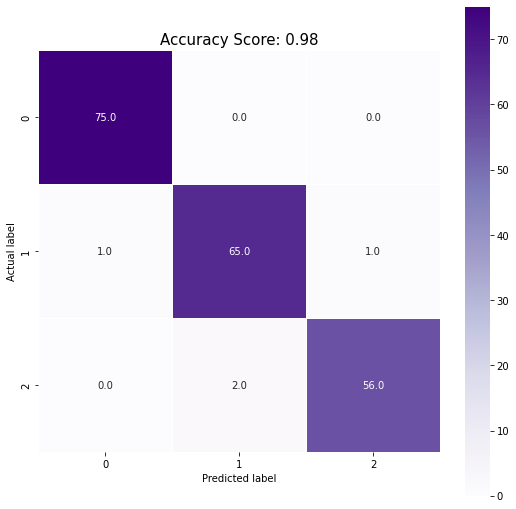

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))

sns.heatmap(confusionMatrics, annot=True, fmt=".1f", linewidths=.5, square=True, cmap="Purples")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)
